In [9]:
#importing necessary modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/project/train.csv


In [2]:
#importing train data
df = pd.read_csv('/kaggle/input/project/train.csv')
df.sample(6)

In [3]:
df.shape

(1458644, 11)

In [5]:
#Khushi 21BCE1282
df=df.drop(['id','vendor_id','pickup_datetime','dropoff_datetime'],axis=1)
df.dtypes

passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
#Khushi 21BCE1282
#Checking null values
df.isnull().sum()

passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
#To get unique values count
counts = df['store_and_fwd_flag'].value_counts()
print(counts)

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64


In [12]:
#Khushi 21BCE1282
#Label encoder
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
# Encode labels in column 'store_and_fwd_flag'.
df['store_and_fwd_flag']= label_encoder.fit_transform(df['store_and_fwd_flag'])
counts = df['store_and_fwd_flag'].value_counts()
print(counts)

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64


/tmp/ipykernel_32/3533226130.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df.corr()


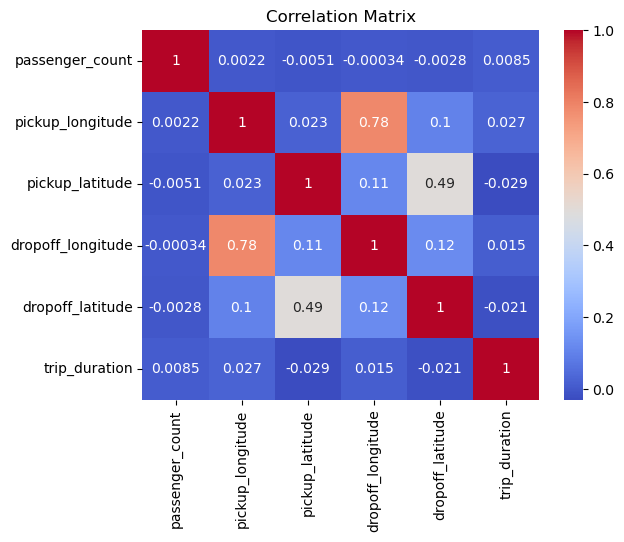

In [10]:
#Khushi 21BCE1282
import seaborn as sns
# Correlation matrix
corr_matrix =df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
#Khushi 21BCE1282
#Seperating into Target variable and Features
X=df.drop(['trip_duration'],axis=1)
y=df['trip_duration']

In [14]:
#Khushi 21BCE1282 
#Scaling between 0-1
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max.fit(X)

MinMaxScaler()

In [15]:
X=min_max.transform(X)
X=pd.DataFrame(X)
X

,0,1,2,3,4,5
0,0.111111,0.791302,0.365738,0.791591,0.731222,0.0
1,0.111111,0.791331,0.364062,0.791016,0.728287,0.0
2,0.111111,0.791354,0.365510,0.790920,0.726493,0.0
3,0.111111,0.790842,0.363001,0.790805,0.726206,0.0
4,0.111111,0.791452,0.367181,0.791454,0.732663,0.0
...,...,...,...,...,...,...
1458639,0.444444,0.791302,0.364459,0.791092,0.729055,0.0
1458640,0.111111,0.790992,0.364565,0.791500,0.733858,0.0
1458641,0.111111,0.791682,0.365787,0.790935,0.726262,0.0
1458642,0.111111,0.791304,0.364661,0.791426,0.730498,0.0


In [16]:
y=pd.DataFrame(y)
min_max.fit(y)
y=min_max.transform(y)
y=pd.DataFrame(y)
y


,0
0,0.000129
1,0.000188
2,0.000602
3,0.000121
4,0.000123
...,...
1458639,0.000220
1458640,0.000185
1458641,0.000216
1458642,0.000105


In [18]:
#Khushi 21BCE1282
#splitting into training and testing data for creating model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(X_test)

In [21]:
#Khushi 21BCE1282
#predicted values 
y_pred

array([[0.00028499],
       [0.00023014],
       [0.00025797],
       ...,
       [0.00027275],
       [0.00024765],
       [0.00023225]])

In [22]:
#Khushi 21BCE1282
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score = r2_score(y_test,y_pred)
print("The accuracy of our model is {}%".format(score, 2))
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolue error:",mae)
mse = mean_squared_error(y_test,y_pred)
print("Mean squareed error: ",mse)

The accuracy of our model is 0.0015590513645580284%
Mean absolue error: 0.0001707185148601693
Mean squareed error:  1.8471075927914924e-06
